![Bluemetrica](../bluemetrica_large.png)

# Regresja liniowa

In [61]:
# wczytujemy biblioteki
import numpy as np         # algebra liniowa
import pandas as pd        # praca z danymi
import matplotlib.pyplot as plt # wykresy
import seaborn as sns # wykresy statystyczne

# żeby wykresy wyświetlały się same pod komórką
%matplotlib inline

### Wczytujemy dane za pomocą pandas 

In [4]:
# Tab podpowiada i uzupełnia kod
house = pd.read_csv("../house data/train.csv")

# DataFrame
# nazwy kolumn, nazwy wierszy (opcjonalnie), kolumna ma jeden typ danych

`.head()`, `.tail()`, `.sample()`

In [14]:
house.head() 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [8]:
house['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
5       14115
6       10084
7       10382
8        6120
9        7420
10      11200
11      11924
12      12968
13      10652
14      10920
15       6120
16      11241
17      10791
18      13695
19       7560
20      14215
21       7449
22       9742
23       4224
24       8246
25      14230
26       7200
27      11478
28      16321
29       6324
        ...  
1430    21930
1431     4928
1432    10800
1433    10261
1434    17400
1435     8400
1436     9000
1437    12444
1438     7407
1439    11584
1440    11526
1441     4426
1442    11003
1443     8854
1444     8500
1445     8400
1446    26142
1447    10000
1448    11767
1449     1533
1450     9000
1451     9262
1452     3675
1453    17217
1454     7500
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

### Ogólna informacja o zbiorze

In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [18]:
house.describe().round(1).T

count      mean      std      min       25%       50%  \
Id             1460.0     730.5    421.6      1.0     365.8     730.5   
MSSubClass     1460.0      56.9     42.3     20.0      20.0      50.0   
LotFrontage    1201.0      70.0     24.3     21.0      59.0      69.0   
LotArea        1460.0   10516.8   9981.3   1300.0    7553.5    9478.5   
OverallQual    1460.0       6.1      1.4      1.0       5.0       6.0   
OverallCond    1460.0       5.6      1.1      1.0       5.0       5.0   
YearBuilt      1460.0    1971.3     30.2   1872.0    1954.0    1973.0   
YearRemodAdd   1460.0    1984.9     20.6   1950.0    1967.0    1994.0   
MasVnrArea     1452.0     103.7    181.1      0.0       0.0       0.0   
BsmtFinSF1     1460.0     443.6    456.1      0.0       0.0     383.5   
BsmtFinSF2     1460.0      46.5    161.3      0.0       0.0       0.0   
BsmtUnfSF      1460.0     567.2    441.9      0.0     223.0     477.5   
TotalBsmtSF    1460.0    1057.4    438.7      0.0     795.8     991.5   
1stFlrSF       1460.0    1162.6    386.6    334.0     882.0    1087.0   
2ndFlrSF       1460.0     347.0    436.5      0.0       0.0       0.0   
LowQualFinSF   1460.0       5.8     48.6      0.0       0.0       0.0   
GrLivArea      1460.0    1515.5    525.5    334.0    1129.5    1464.0   
BsmtFullBath   1460.0       0.4      0.5      0.0       0.0       0.0   
BsmtHalfBath   1460.0       0.1      0.2      0.0       0.0       0.0   
FullBath       1460.0       1.6      0.6      0.0       1.0       2.0   
HalfBath       1460.0       0.4      0.5      0.0       0.0       0.0   
BedroomAbvGr   1460.0       2.9      0.8      0.0       2.0       3.0   
KitchenAbvGr   1460.0       1.0      0.2      0.0       1.0       1.0   
TotRmsAbvGrd   1460.0       6.5      1.6      2.0       5.0       6.0   
Fireplaces     1460.0       0.6      0.6      0.0       0.0       1.0   
GarageYrBlt    1379.0    1978.5     24.7   1900.0    1961.0    1980.0   
GarageCars     1460.0       1.8      0.7      0.0       1.0       2.0   
GarageArea     1460.0     473.0    213.8      0.0     334.5     480.0   
WoodDeckSF     1460.0      94.2    125.3      0.0       0.0       0.0   
OpenPorchSF    1460.0      46.7     66.3      0.0       0.0      25.0   
EnclosedPorch  1460.0      22.0     61.1      0.0       0.0       0.0   
3SsnPorch      1460.0       3.4     29.3      0.0       0.0       0.0   
ScreenPorch    1460.0      15.1     55.8      0.0       0.0       0.0   
PoolArea       1460.0       2.8     40.2      0.0       0.0       0.0   
MiscVal        1460.0      43.5    496.1      0.0       0.0       0.0   
MoSold         1460.0       6.3      2.7      1.0       5.0       6.0   
YrSold         1460.0    2007.8      1.3   2006.0    2007.0    2008.0   
SalePrice      1460.0  180921.2  79442.5  34900.0  129975.0  163000.0   

                    75%       max  
Id               1095.2    1460.0  
MSSubClass         70.0     190.0  
LotFrontage        80.0     313.0  
LotArea         11601.5  215245.0  
OverallQual         7.0      10.0  
OverallCond         6.0       9.0  
YearBuilt        2000.0    2010.0  
YearRemodAdd     2004.0    2010.0  
MasVnrArea        166.0    1600.0  
BsmtFinSF1        712.2    5644.0  
BsmtFinSF2          0.0    1474.0  
BsmtUnfSF         808.0    2336.0  
TotalBsmtSF      1298.2    6110.0  
1stFlrSF         1391.2    4692.0  
2ndFlrSF          728.0    2065.0  
LowQualFinSF        0.0     572.0  
GrLivArea        1776.8    5642.0  
BsmtFullBath        1.0       3.0  
BsmtHalfBath        0.0       2.0  
FullBath            2.0       3.0  
HalfBath            1.0       2.0  
BedroomAbvGr        3.0       8.0  
KitchenAbvGr        1.0       3.0  
TotRmsAbvGrd        7.0      14.0  
Fireplaces          1.0       3.0  
GarageYrBlt      2002.0    2010.0  
GarageCars          2.0       4.0  
GarageArea        576.0    1418.0  
WoodDeckSF        168.0     857.0  
OpenPorchSF        68.0     547.0  
EnclosedPorch       0.0     552.0  
3SsnPorch       

## Modelowanie kroki

1. Czyszczenie danych
    - czy nie ma nieprawidłowych wartości?
    - wartości brakujące
    - outliery (obserwacje nietypowe)
    - odrzucamy niepotrzebne zmienne
    - dodajemy nowe zmienne
    - typy danych sprawdzam
1. Wybór zmiennych do modelu
1. Podział zbioru na treningowy i testowy
1. Budowa modelu

In [21]:
# oglądam zmienne kategorii
house.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [27]:
house.LotShape.value_counts(normalize=True)

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

In [28]:
house.Alley.value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [31]:
# zmienne liczbowe mogę pokazać jako przedziały
house.SalePrice.value_counts(bins = 5, sort = False)

(34179.899000000005, 178920.0]    871
(178920.0, 322940.0]              508
(322940.0, 466960.0]               70
(466960.0, 610980.0]                7
(610980.0, 755000.0]                4
Name: SalePrice, dtype: int64

In [32]:
# jakie są kategorie
house.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [33]:
# Ile jest unikatowych kategorii
house.Alley.nunique()

2

In [35]:
house.GarageYrBlt.value_counts(dropna = False)

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
1962.0    21
2009.0    21
1966.0    21
1965.0    21
1958.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1997.0    19
1978.0    19
1960.0    19
1954.0    19
1974.0    18
          ..
1916.0     5
1922.0     5
1936.0     5
1945.0     4
1946.0     4
1982.0     4
1931.0     4
1928.0     4
1935.0     4
1932.0     3
1952.0     3
1921.0     3
1938.0     3
2010.0     3
1910.0     3
1924.0     3
1923.0     3
1947.0     2
1918.0     2
1929.0     2
1914.0     2
1915.0     2
1934.0     2
1937.0     2
1942.0     2
1906.0     1
1927.0     1
1900.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

### Wybór zmiennych



In [37]:
house.CentralAir
house.OverallQual
house.OverallCond
house.GrLivArea
house.LotArea
house.YearBuilt
house.YearRemodAdd
house.GarageArea
house.SaleCondition
house.Heating

0       Y
1       Y
2       Y
3       Y
4       Y
5       Y
6       Y
7       Y
8       Y
9       Y
10      Y
11      Y
12      Y
13      Y
14      Y
15      Y
16      Y
17      Y
18      Y
19      Y
20      Y
21      Y
22      Y
23      Y
24      Y
25      Y
26      Y
27      Y
28      Y
29      N
       ..
1430    Y
1431    Y
1432    Y
1433    Y
1434    Y
1435    Y
1436    Y
1437    Y
1438    Y
1439    Y
1440    Y
1441    Y
1442    Y
1443    N
1444    Y
1445    Y
1446    Y
1447    Y
1448    N
1449    Y
1450    Y
1451    Y
1452    Y
1453    Y
1454    Y
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: CentralAir, Length: 1460, dtype: object

In [40]:
zmienne = pd.read_clipboard(header = None)

In [51]:
zmienne = zmienne.iloc[:,0].str.replace("house.", "").values

In [57]:
# wybrane przez nas zmienne
house[zmienne]

CentralAir  OverallQual  OverallCond  GrLivArea  LotArea  YearBuilt  \
0             Y            7            5       1710     8450       2003   
1             Y            6            8       1262     9600       1976   
2             Y            7            5       1786    11250       2001   
3             Y            7            5       1717     9550       1915   
4             Y            8            5       2198    14260       2000   
5             Y            5            5       1362    14115       1993   
6             Y            8            5       1694    10084       2004   
7             Y            7            6       2090    10382       1973   
8             Y            7            5       1774     6120       1931   
9             Y            5            6       1077     7420       1939   
10            Y            5            5       1040    11200       1965   
11            Y            9            5       2324    11924       2005   
12            Y            5            6        912    12968       1962   
13            Y            7            5       1494    10652       2006   
14            Y            6            5       1253    10920       1960   
15            Y            7            8        854     6120       1929   
16            Y            6            7       1004    11241       1970   
17            Y            4            5       1296    10791       1967   
18            Y            5            5       1114    13695       2004   
19            Y            5            6       1339     7560       1958   
20            Y            8            5       2376    14215       2005   
21            Y            7            7       1108     7449       1930   
22            Y            8            5       1795     9742       2002   
23            Y            5            7       1060     4224       1976   
24            Y            5            8       1060     8246       1968   
25            Y            8            5       1600    14230       2007   
26            Y            5            7        900     7200       1951   
27            Y            8            5       1704    11478       2007   
28            Y            5            6       1600    16321       1957   
29            N            4            6        520     6324       1927   
...         ...          ...          ...        ...      ...        ...   
1430          Y            5            5       1838    21930       2005   
1431          Y            6            6        958     4928       1976   
1432          Y            4            6        968    10800       1927   
1433          Y            6            5       1792    10261       2000   
1434          Y            5            5       1126    17400       1977   
1435          Y            6            9       1537     8400       1962   
1436          Y            4            6        864     9000       1971   
1437          Y            8            5       1932    12444       2008   
1438          Y            6            7       1236     7407       1957   
1439          Y            7            6       1725    11584       1979   
1440          Y            6            7       2555    11526       1922   
1441          Y            6            5        848     4426       2004   
1442          Y           10            5       2007    11003       2008   
1443          N            6            6        952     8854       1916   
1444          Y            7            5       1422     8500       2004   
1445          Y            6            5        913     8400       1966   
1446          Y            5            7       1188    26142       1962   
1447          Y            8            5       2090    10000       1995   
1448          N            4            7       1346    11767       1910   
1449          Y            5            7        630     1533       1970   
1450          Y            5            5       1792 

### Czy centralne ogrzewanie ma wpływ na cenę domu?

In [63]:
house.CentralAir.value_counts(dropna = False)

Y    1365
N      95
Name: CentralAir, dtype: int64

In [67]:
house.groupby("SaleCondition")['SalePrice'].describe()

count           mean            std       min        25%  \
SaleCondition                                                              
Abnorml         101.0  146526.623762   82796.213395   34900.0  104000.00   
AdjLand           4.0  104125.000000   26135.464411   81000.0   81750.00   
Alloca           12.0  167377.416667   84460.527502   55993.0  116383.25   
Family           20.0  149600.000000   47820.002421   82500.0  115500.00   
Normal         1198.0  175202.219533   69713.636280   39300.0  130000.00   
Partial         125.0  272291.752000  103696.404119  113000.0  193879.00   

                    50%       75%       max  
SaleCondition                                
Abnorml        130000.0  172500.0  745000.0  
AdjLand        104000.0  126375.0  127500.0  
Alloca         148145.0  202043.0  359100.0  
Family         140500.0  170250.0  259000.0  
Normal         160000.0  205000.0  755000.0  
Partial        244600.0  339750.0  611657.0

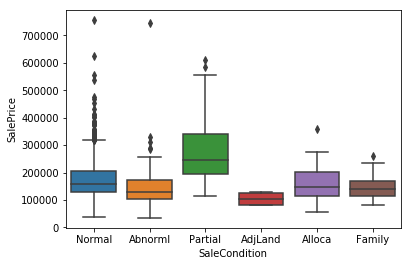

In [71]:
sns.boxplot(x = "SaleCondition", y = "SalePrice", data = house)

### Oglądam zmienne numeryczne

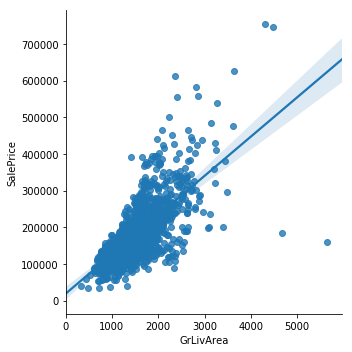

In [96]:
sns.lmplot(x = "GrLivArea",  y = "SalePrice", data = house)

In [82]:
# Zamieniam obiekt zmienne z array na listę żeby wygodniej mi się z nim pracowało
zmienne = list(zmienne)
zmienne + ["SalePrice"]

['CentralAir',
 'OverallQual',
 'OverallCond',
 'GrLivArea',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'GarageArea',
 'SaleCondition',
 'Heating',
 'SalePrice']

In [106]:
macierz_kor = house[zmienne + ["SalePrice"]].corr()
macierz_kor

OverallQual  OverallCond  GrLivArea   LotArea  YearBuilt  \
OverallQual      1.000000    -0.091932   0.593007  0.105806   0.572323   
OverallCond     -0.091932     1.000000  -0.079686 -0.005636  -0.375983   
GrLivArea        0.593007    -0.079686   1.000000  0.263116   0.199010   
LotArea          0.105806    -0.005636   0.263116  1.000000   0.014228   
YearBuilt        0.572323    -0.375983   0.199010  0.014228   1.000000   
YearRemodAdd     0.550684     0.073741   0.287389  0.013788   0.592855   
GarageArea       0.562022    -0.151521   0.468997  0.180403   0.478954   
SalePrice        0.790982    -0.077856   0.708624  0.263843   0.522897   

              YearRemodAdd  GarageArea  SalePrice  
OverallQual       0.550684    0.562022   0.790982  
OverallCond       0.073741   -0.151521  -0.077856  
GrLivArea         0.287389    0.468997   0.708624  
LotArea           0.013788    0.180403   0.263843  
YearBuilt         0.592855    0.478954   0.522897  
YearRemodAdd      1.000000    0.371600   0.507101  
GarageArea        0.371600    1.000000   0.623431  
SalePrice         0.507101    0.623431   1.000000

### Rysuję macierz korelacji

(8.5, -0.5)

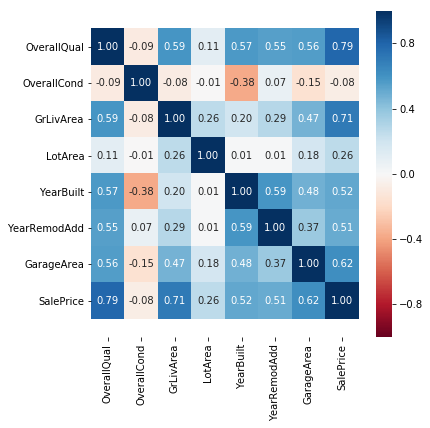

In [108]:
plt.figure(figsize= (6,6))

sns.heatmap(macierz_kor, cmap = "RdBu", # dane i paleta barw
            center = 0, vmin = -1, vmax = 1, # ustawiam zakres kolorów
           annot = True, fmt = ".2f") # dodaje i formatuję adnotacje

# ucięta heatmapa obejscie 
b,t = plt.ylim()
b += 0.5 # b = b + 0.5
t -= 0.5
plt.ylim(b,t)
# koniec obejścia (matplotlib 3.1.1 ma ten błąd)

### Klastermapa

Zmienne o podobnych wartościach sa pogrupowane obok siebie

<Figure size 864x864 with 0 Axes>

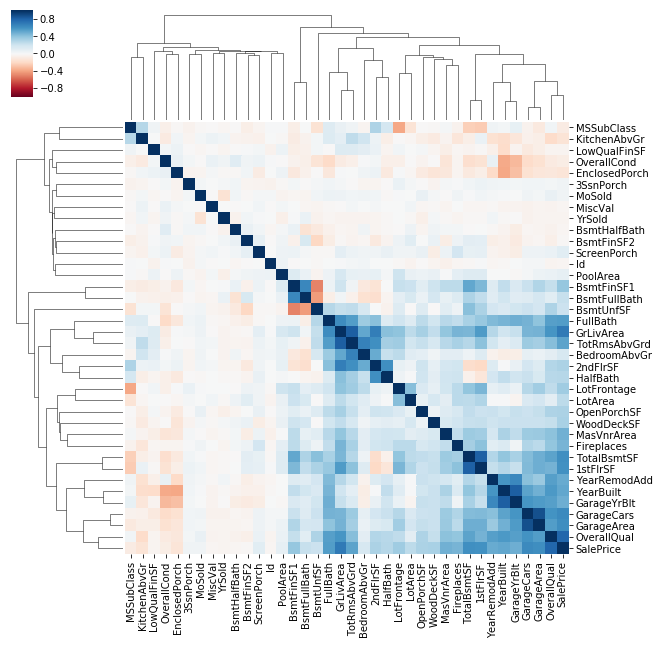

In [105]:
plt.figure(figsize= (12,12))

sns.clustermap(house.corr(), cmap = "RdBu", # dane i paleta barw
            center = 0, vmin = -1, vmax = 1) # dodaje i formatuję adnotacje

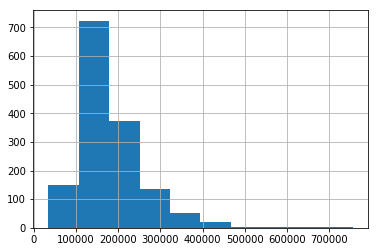

In [114]:
house.SalePrice.hist()

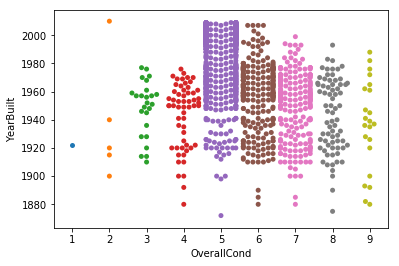

In [121]:
sns.swarmplot(x = "OverallCond", y = "YearBuilt", data = house)

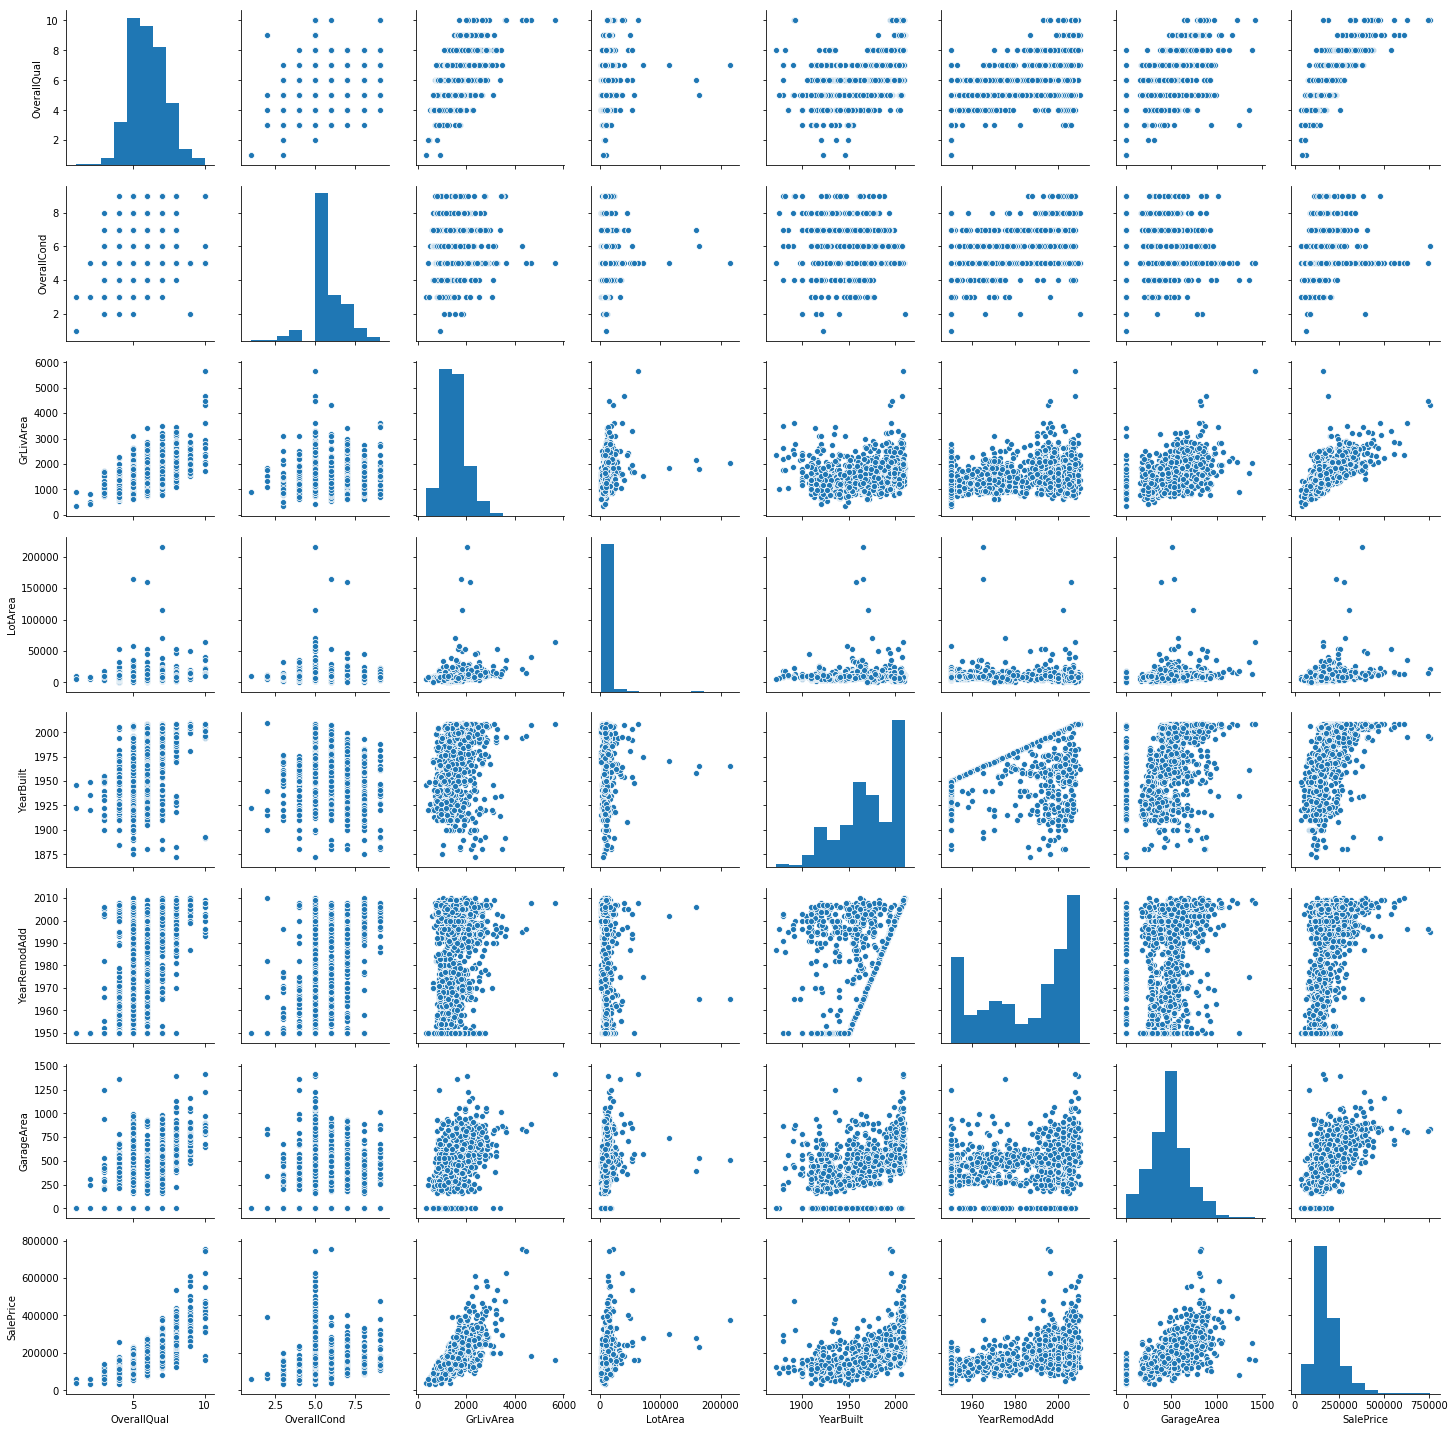

In [117]:
sns.pairplot(house[zmienne + ['SalePrice']])

### Zmienne 0-1 (dummies)

In [151]:
house_d = pd.get_dummies(house[zmienne], drop_first=True)

### Podział danych na zbiór treningowy i testowy

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [153]:
train, test, y_train, y_test = train_test_split(house_d, house['SalePrice'],
                                                test_size = 0.2, random_state = 123)

In [154]:
train.shape

(1168, 18)

In [156]:
test.shape

(292, 18)

In [157]:
y_train.shape

(1168,)

### Budujemy model

In [142]:
lm = LinearRegression()
lm.fit(house[['GrLivArea']], house['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
# wyraz wolny (Beta 0)
lm.intercept_

18569.02585648728

In [144]:
# oszacowania parametrów
lm.coef_

array([107.13035897])

In [145]:
powierzchnia = 3000

lm.intercept_ + lm.coef_[0] * powierzchnia

339960.1027539628

### Model z wieloma zmiennymi

In [158]:
train.head()

OverallQual  OverallCond  GrLivArea  LotArea  YearBuilt  YearRemodAdd  \
318            7            5       2646     9900       1993          1993   
580            6            6       1429    14585       1960          1987   
961            6            7       2872    12227       1977          1995   
78             4            5       1768    10778       1968          1968   
5              5            5       1362    14115       1993          1995   

     GarageArea  CentralAir_Y  SaleCondition_AdjLand  SaleCondition_Alloca  \
318         656             1                      0                     0   
580         572             1                      0                     0   
961         619             1                      0                     0   
78            0             0                      0                     0   
5           480             1                      0                     0   

     SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
318                     0                     1                      0   
580                     0                     1                      0   
961                     0                     1                      0   
78                      0                     1                      0   
5                       0                     1                      0   

     Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  
318             1             0             0             0             0  
580             1             0             0             0             0  
961             1             0             0             0             0  
78              1             0             0             0             0  
5               1             0             0             0             0

In [159]:
# szacujemy model na wielu zmiennych
lm = LinearRegression()
lm.fit(train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
lm.intercept_

-1137451.4426503794

In [162]:
# oszacowania parametrów
pd.Series(lm.coef_, train.columns)

OverallQual              21860.026294
OverallCond               4220.678949
GrLivArea                   51.175589
LotArea                      0.857937
YearBuilt                  414.651349
YearRemodAdd               127.984374
GarageArea                  45.488195
CentralAir_Y             -3889.553005
SaleCondition_AdjLand    11052.322711
SaleCondition_Alloca      6001.140859
SaleCondition_Family    -12891.639771
SaleCondition_Normal      5735.198448
SaleCondition_Partial    26172.044483
Heating_GasA            -21074.747965
Heating_GasW            -29997.196416
Heating_Grav              5003.510618
Heating_OthW            -82524.099560
Heating_Wall             -5837.012486
dtype: float64

### Czy ten model jest dobry?

Musimy go sprawdzić na danych testowych

In [163]:
# współczynnik R2 - wartości do 0 do 1
lm.score(train, y_train)

0.7646011074236856

In [164]:
lm.score(test, y_test)

0.8123806610271163

### Zróbmy prognozy z modelu

In [166]:
predykcje = lm.predict(test)

(array([14., 55., 62., 53., 51., 30., 15.,  7.,  4.,  1.]),
 array([ 54631.0722001 ,  91039.16653518, 127447.26087027, 163855.35520535,
        200263.44954043, 236671.54387551, 273079.63821059, 309487.73254568,
        345895.82688076, 382303.92121584, 418712.01555092]),
 <a list of 10 Patch objects>)

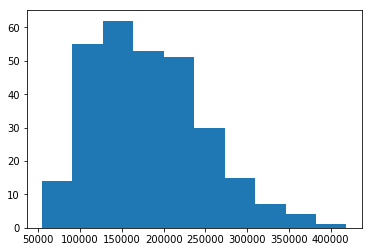

In [168]:
predykcje

plt.hist(predykcje)

Text(0, 0.5, 'Actuals')

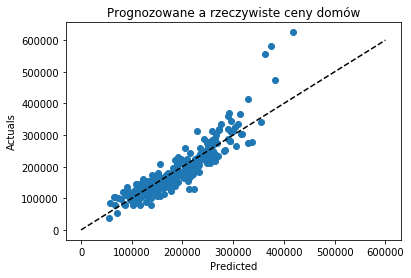

In [179]:
# Wykres predicted vs actuals
plt.scatter(predykcje, y_test) # wykrs punktowy
plt.plot(range(600000), "k--") # linia 45 stopni

#plt.xlim([0,600000]) # zakres osi x
#plt.ylim([0,600000]) # zakres osi Y

plt.title("Prognozowane a rzeczywiste ceny domów")
plt.xlabel("Predicted")
plt.ylabel("Actuals")

### Ocena jakości modelu

In [184]:
wyniki = pd.DataFrame({"Actual":y_test, "Predicted":predykcje})
wyniki

Actual      Predicted
147   222500  235296.004764
676    87000  106032.106678
1304  130000  212463.684744
1372  274300  248049.598610
1427  140000  136219.479680
1127  259000  205716.252401
35    309000  295299.715588
954   127500  130822.367277
1296  155000  132209.000893
613   147000  147754.767613
18    159000  156125.219913
602   220000  244131.044475
1297  140000  186026.914309
734   108000   92866.718798
316   260000  253893.037923
28    207500  155395.206781
1048  115000  163531.725508
167   325624  304351.963944
756   212000  254382.695074
1067  167900  176463.365210
1259  151000  159923.306640
1293  162900  207564.648165
156   109500  128133.878088
1149  143000  183191.104075
1410  230000  236369.430873
36    145000  151890.620383
476   208900  190128.107700
1260  181000  210041.596836
512   129900  116611.293723
772   107000  156535.405173
...      ...            ...
949   197500  187907.276086
152   190000  202327.660340
1455  175000  192442.852410
110   136900  171862.478670
1223  137900  170345.061536
650   205950  228476.066384
968    37900   54631.072200
308    82500   85025.075463
784   128000  130892.676729
1144   80000  102490.493343
1203  213000  215138.733554
163   103200   67334.629906
270   266000  304599.648356
33    165500  153131.035606
385   192000  214104.734932
929   222000  255876.936116
966   160000  122976.326566
427   109008   87822.098078
873   133000  128299.378242
486   156000  135608.673282
646    98300  110776.844937
996   136500  121671.084792
623   168500  180063.002677
1028  105000  117609.091810
1108  181000  189584.578988
1012  165000  150996.595798
1059  220000  185915.035762
890   122900  127462.319050
628   135000  162874.370900
352    95000  109988.226649

[292 rows x 2 columns]

In [185]:
wyniki["pro"] = (wyniki.Actual-wyniki.Predicted)/wyniki.Actual

##### O ile % przeciętnie mylę się w swoich prognozach?

In [191]:
np.sqrt(np.mean(wyniki.pro ** 2))

0.17511310429593477

Pierwiastek procentowego błędu średniokwadratowego (RMSPE)

Room mean square percentage error

### Funkcje do mierzenia jakości modelu

In [192]:
from sklearn import metrics

In [193]:
#MAE
metrics.mean_absolute_error(wyniki.Actual, wyniki.Predicted)

23037.823889073257

In [194]:
#MSE
metrics.mean_squared_error(wyniki.Actual, wyniki.Predicted)

1159415278.6164508

In [195]:
#RMSE - przeciętnie mylimy sie o...
np.sqrt(metrics.mean_squared_error(wyniki.Actual, wyniki.Predicted))

34050.18764436476

In [196]:
# RMSLE
np.sqrt(metrics.mean_squared_log_error(wyniki.Actual, wyniki.Predicted))

0.16734260401884093